<a id='Оглавление'></a>
### [Цель проекта](#Цель_проекта) 
### [Описание данных](#Описание_данных) 
### [Первичный осмотр данных](#Первичный_осмотр_данных) 
### [Предобработка данных](#Предобработка_данных) 
### [Исследовательский анализ данных](#Исследовательский_анализ_данных) 
### [Составим портрет пользователя каждого региона](#Составим_портрет)
### [Проверим гипотезы](#Проверим_гипотезы) 
### [Общий вывод](#Общий_вывод)

<a id='Цель_проекта'></a>
### Цель проекта
[Оглавление](#Оглавление)
        
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
   
Перед нами данные до 2016 года, и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a id='Описание_данных'></a>
### Описание данных
[Оглавление](#Оглавление)

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
*Данные за 2016 год могут быть неполными.

<a id='Первичный_осмотр_данных'></a>
### Первичный осмотр данных
[Оглавление](#Оглавление)

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')

In [2]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10090,Jikkyou Powerful Pro Yakyuu '95,PS,1994.0,Sports,0.00,0.00,0.11,0.01,NaN,NaN,NaN
16252,Entaku no Seito: Students of Round,X360,2011.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
13080,Legend of Kay,WiiU,2015.0,Action,0.03,0.02,0.00,0.00,NaN,NaN,NaN
11976,Jewel Link Chronicles: Legend of Athena,DS,2011.0,Puzzle,0.00,0.06,0.00,0.01,NaN,NaN,NaN
12824,Nobunaga no Yabou: Souzou,PS4,2014.0,Strategy,0.00,0.00,0.06,0.00,NaN,NaN,NaN
2671,Personal Trainer: Walking,DS,2008.0,Sports,0.21,0.32,0.17,0.07,69.0,tbd,E
567,Call Of Duty 2: Big Red One,PS2,2005.0,Shooter,1.48,0.92,0.01,0.26,77.0,8.2,T
3587,Manhunt 2,PS2,2007.0,Action,0.27,0.21,0.00,0.07,67.0,7.8,M
7781,IHRA Professional Drag Racing 2005,PS2,2004.0,Racing,0.09,0.07,0.00,0.02,NaN,tbd,E
7105,Saint Seiya: Sanctuary Battle,PS3,2011.0,Action,0.00,0.09,0.11,0.02,62.0,7.3,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.duplicated().sum()

0

### Вывод:

- требуется привести названия столбцов к нижему регистру
- Year_of_Release изменим тип данных на даты
- Rating изменим тип на числовой

<a id='Предобработка_данных'></a>
### [Предобработка данных](#Предобработка_данных) 
[Оглавление](#Оглавление)

#### Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изменим типы данных столбцов

In [7]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')

In [8]:
data['year_of_release'].sample(10)

5968     2012
12448    2001
14252       0
14978    2009
4618     2014
13380    2007
15021    2016
8495     2011
14052    2005
10456    2005
Name: year_of_release, dtype: int64

Это не datetime, но для наших целей типа int будет достаточно

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - говорит нам, что рейтинг еще не присвоен. Можно заменить на NaN, а после на float

In [10]:
import numpy as np
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [11]:
data['user_score'] = data['user_score'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Обработаем пропуски

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

- пропуски в name и genre можем оставить, названия нам безразличны, а 2 пропущенных жанра ни на что не повлияют
- critic_score, user_score слишком много пропусков, чтобы не исказить заменой. Пропуски возможны, из-за отсутствия достаточного кол-ва оценок от пользователей и критиков. Это примерно половина данных, но остальных данных должно быть достаточно для общей картины 
- rating можем только смириться, присаваивать его наугад не имеет смысла. Есть предположение, что эта система оценок может действовать не на все страны, и если игра не выходит за пределами этой страны, то и рейтинг не присваивается


#### Посчитаем суммарные продажи (млн) во всех регионах и запишите их в отдельный столбец

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


In [15]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5473,Sniper: Ghost Warrior 2,PS3,2013,Shooter,0.05,0.18,0.03,0.07,52.0,6.0,M,0.33
5154,NCAA Football 07,PSP,2006,Sports,0.34,0.00,0.00,0.03,75.0,7.9,E,0.37
3049,Jikkyou World Soccer 2000 Final Edition,PS2,2000,Sports,0.00,0.00,0.66,0.00,NaN,NaN,NaN,0.66
708,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
4156,Valkyrie Profile 2: Silmeria,PS2,2006,Role-Playing,0.04,0.03,0.39,0.01,84.0,9.0,T,0.47
5577,Marvel: Ultimate Alliance 2,Wii,2009,Role-Playing,0.25,0.05,0.00,0.03,50.0,5.2,T,0.33
11004,Blood of Bahamut,DS,2009,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,NaN,0.09
12068,Tank! Tank! Tank!,WiiU,2012,Action,0.02,0.01,0.05,0.00,NaN,NaN,NaN,0.08
7916,"Ni Hao, Kai-lan: Super Game Day",Wii,2009,Misc,0.17,0.00,0.00,0.01,NaN,8.5,E,0.18
12856,Ski Region Simulator,PC,2011,Simulation,0.00,0.05,0.00,0.01,NaN,NaN,NaN,0.06


<a id='Исследовательский_анализ_данных'></a>
### [Исследовательский анализ данных](#Предобработка_данных) 
[Оглавление](#Оглавление)


#### Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды

In [16]:
import matplotlib.pyplot as plt 

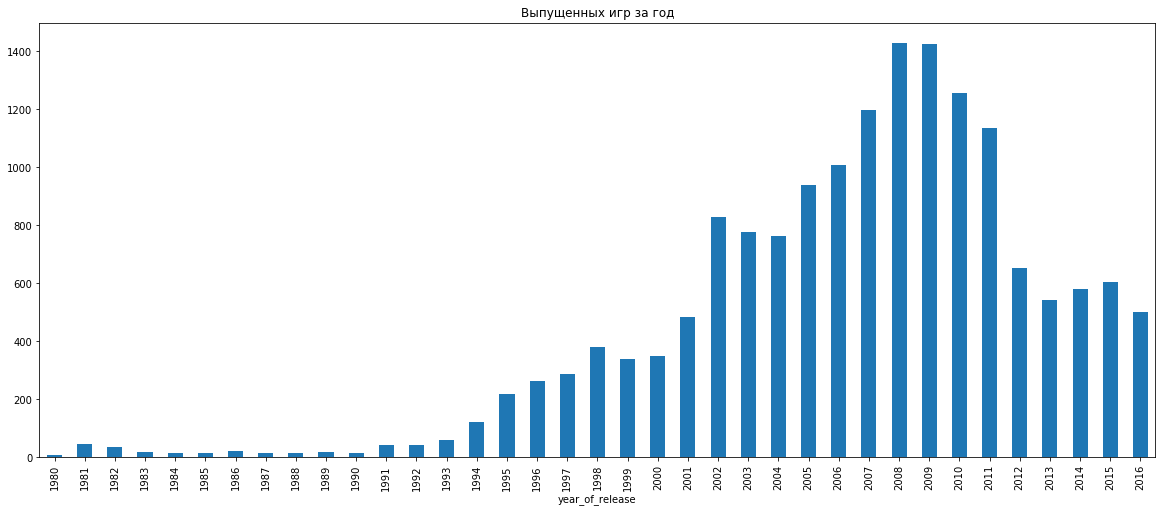

In [17]:
data[data['year_of_release'] > 0].groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (20, 8),\
                                                                                  title = 'Выпущенных игр за год')
plt.show()

График показывает как рынок зарождался и становился. На 2008-2009 годы пришелся пик роста, после чего по экономическим причинам кол-во выпускаемых проектов резко сократилось. Ситуация стабилизировалась в 2013-2014 годах. Примем 2013-2016 за актуальный промежуток, т.к. в нем будут представлены востребованные жанры и актуальные платформы. 

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы

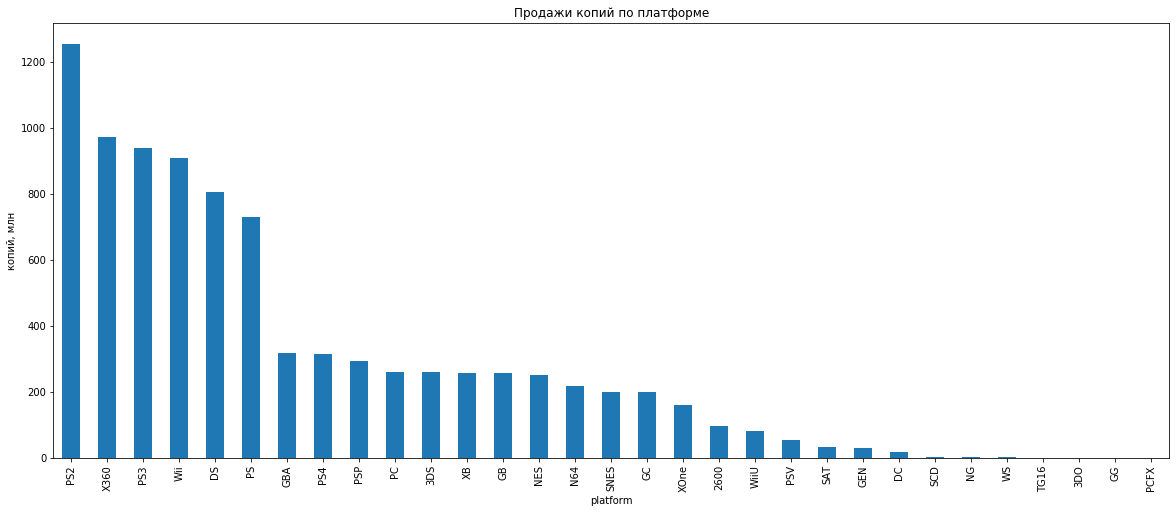

In [18]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = (20, 8),\
                                                                                  title = 'Продажи копий по платформе')
plt.ylabel('копий, млн')
plt.show()

In [19]:
top6 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)
top6

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

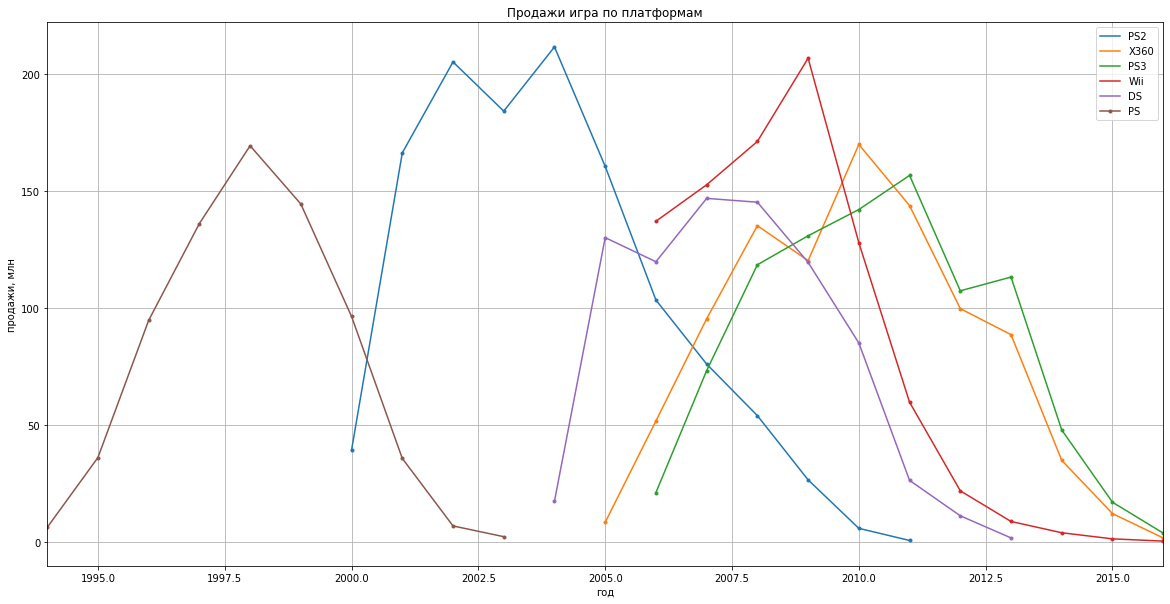

In [20]:
for platform in top6.index:
    data[(data['platform'] == platform) & (data['year_of_release'] > 1985)]\
    .pivot_table(index = 'year_of_release', values='total_sales', aggfunc='sum')['total_sales']\
    .plot(figsize=(20, 10), style = '.-', label = platform, legend=True, grid=True, title = 'Продажи игра по платформам')
plt.xlabel('год')
plt.ylabel('продажи, млн')
plt.show()

Судьба у всех платформ разная, но их жизнь длится примерно 10 лет.

#### Возьмем данные за соответствующий *актуальный период*. Актуальный период мы определили самостоятельно в результате исследования предыдущих вопросов. 

Мы приняли актуальный период для игр 2013-2016 года. Платформы же мы будем учитывать те, которые были выпущены в пределах 4-5 лет от 2016 года, т.к. к середине жизни консоли достигают пика актуальности и продажи начинают падать, но еще 1-2 года после пика показатели  на ходятся на приемлемом уровне.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Выясним какая платформа в каком году вышла

In [21]:
release_date = data.query('year_of_release > 0').pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'min')\
                                                .sort_values('year_of_release', ascending=False)


Изменим дату для PC, чтобы платформа попала в число актуальных платформ (т.к. она вне времени в данном контексте)

In [22]:
release_date.at['PC', 'year_of_release'] = 2015
release_date = release_date.query('year_of_release >= 2011').sort_values('year_of_release', ascending=False)


Постоим график продаж игр для актуальных платформ:

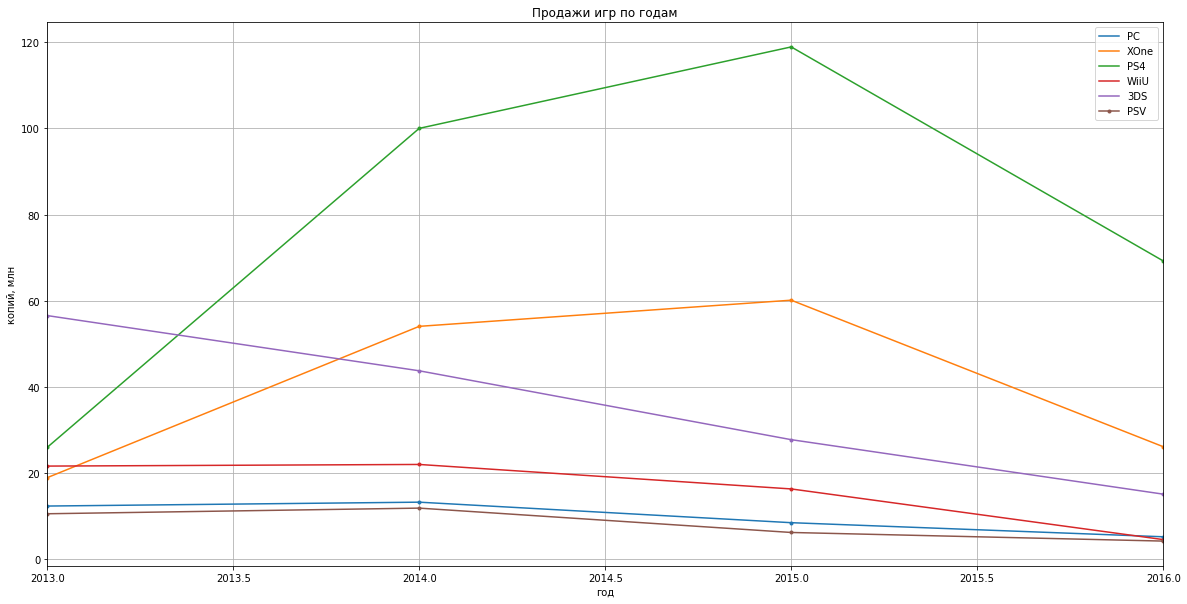

In [23]:
for platform in release_date.index:
    data[(data['platform'] == platform) & (data['year_of_release'] >= 2013)]\
        .pivot_table(index = 'year_of_release', values='total_sales', aggfunc='sum')['total_sales']\
        .plot(figsize=(20, 10), style = '.-', label = platform, legend=True, grid=True, title = 'Продажи игр по годам')
plt.xlabel('год')
plt.ylabel('копий, млн')
plt.show()

2017 год будет непросым для рынка игр. Продажи на всех относительно новых платформах падают. Лидерами можно считать PS4 и XOne. Тройку замыкает 3DS. Также не рекомендуется игнорировать PC, по графику это самая стабильная платформа (с учетом ее возраста). Продажи на PC за три года практически не изменились. 

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [24]:
platforms = [ 'PS4', 'XOne', 'PC', '3DS']

Text(0.5, 1.0, 'Глобальные продажи')

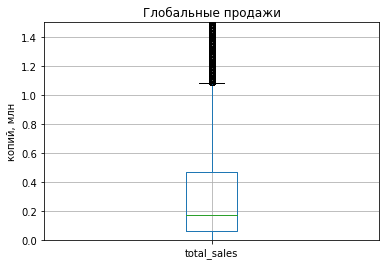

In [25]:
data.boxplot('total_sales').set_ylim(0, 1.5)
plt.ylabel('копий, млн')
plt.title('Глобальные продажи')

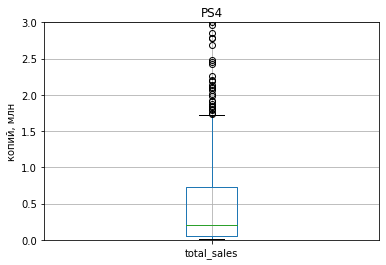

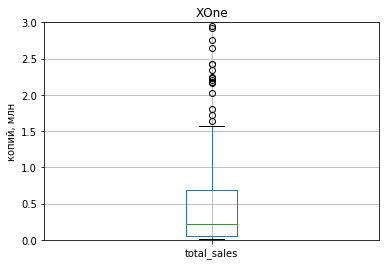

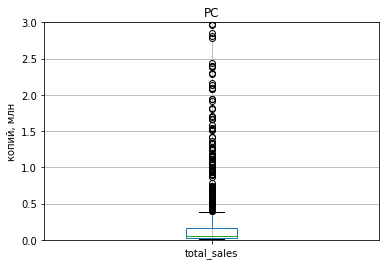

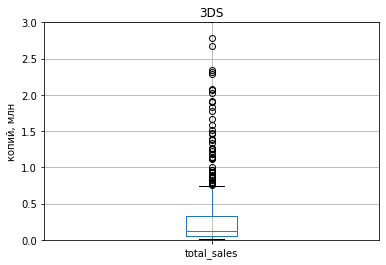

In [26]:
for platform in platforms:
    data[(data['platform'] == platform) & (data['year_of_release'] > 0)].boxplot('total_sales').set_ylim(0, 3)
    plt.ylabel('копий, млн')
    plt.title(platform)
    plt.show()

Платформы PS4, XOne закрепились на продажах 1,5+ млн копий для своих релизов. С учетом того, что на пике между ними разница в 2 раза, то можно предположить, что игры на них продаются примерно одинаково, а PS4 берет только игровым ассортиментом. PC топчется около 0.5 млн, 3DS  демонстрирует  показатель в 750 тыс.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для изучения связи оценок и продаж возьмем платформу PS4, как наиболее представленную за актуальный период

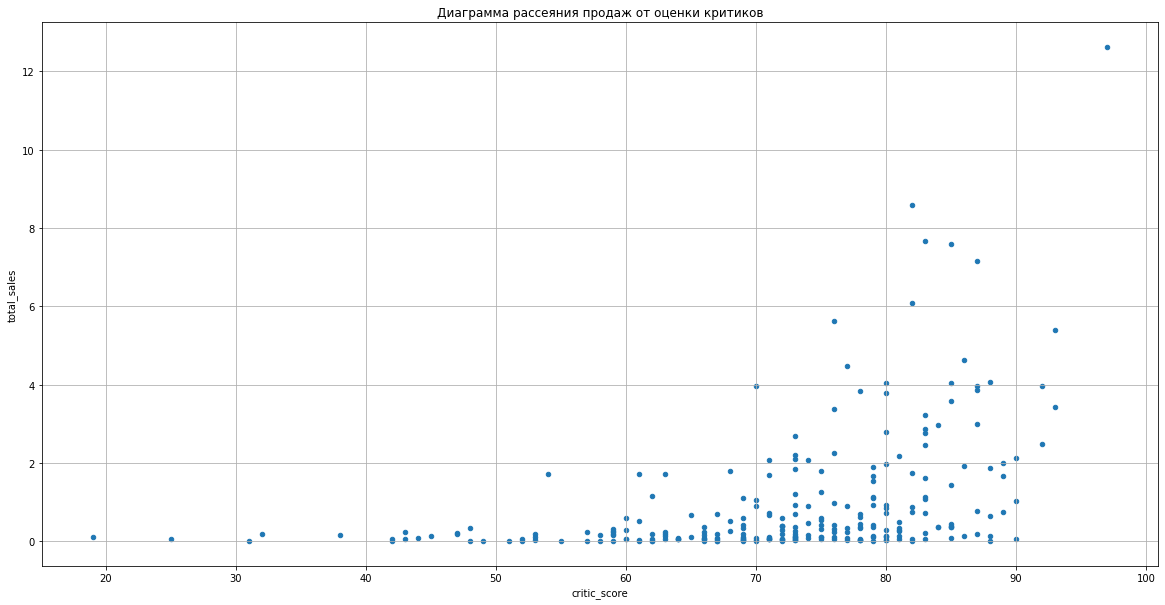

In [27]:
data.query('platform == "PS4"').plot( kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize=(20,10), grid=True)
plt.title('Диаграмма рассеяния продаж от оценки критиков')
plt.show()

Наблюдается некая связь оценки критиков и продаж. Например, только игры с оценкой 70+ смогли преодолеть отметку продаж в 2 млн. копий.
Можно заметить, что продажи наименований с оценкой 80+ менее предсказуемы и достаточно равномерно распределены от полностью незамечанных до супер хитов. 

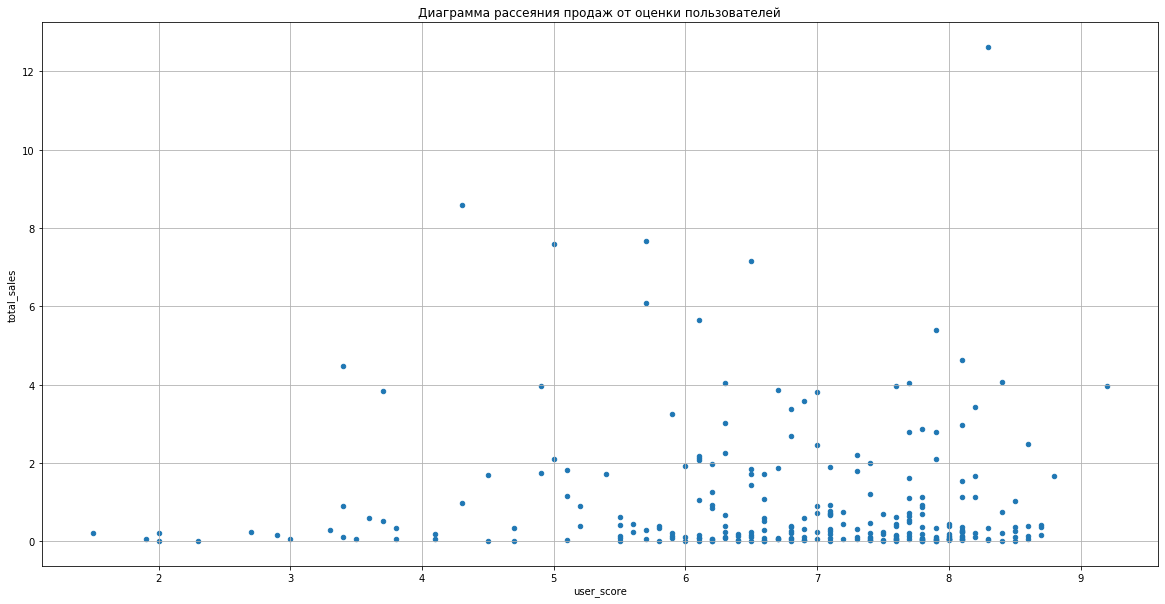

In [28]:
data.query('platform == "PS4"').plot( kind = 'scatter', x = 'user_score', y = 'total_sales', figsize=(20,10), grid=True)
plt.title('Диаграмма рассеяния продаж от оценки пользователей')
plt.show()

Просматривается слабая связь. 
Второй глобальный результат ~8.5 млн. копий у игры с оценкой 4.2 и его смогла превзойти только игра с оценкой 8.3. 
2 игры с оценкой меньше 4 смогли превзойти  по продажам большинство наименований из всего списка. 



По двум графикам видно, что одна и таже игра получила 82 балла у критиков и всего 4.2 у пользователей.

Игры с пользовательским рейтингом меньше 4 у критиков получили оценки 77+ (те которые около 4 млн. копий). 

Оценки критиков и пользователей сошлись (в явном виде) только относительно одной игры.


#### Посчитаем корреляцию между отзывами и продажами. 

In [29]:
import seaborn as sns

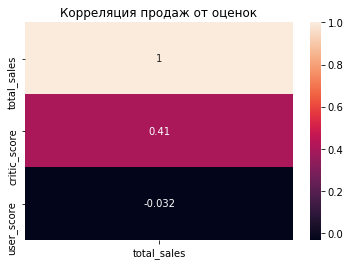

In [30]:
sns.heatmap(data[data['platform'] == "PS4"][['total_sales' ,'critic_score', 'user_score']].corr()[['total_sales']]\
            .sort_values(by='total_sales', ascending=False, ), annot=True)
plt.title('Корреляция продаж от оценок')
plt.show()

Крититики имеют влияние на продажи, а вот оценки пользователей после покупки значения уже не имеют.

#### Соотнесем выводы с продажами игр на других платформах.

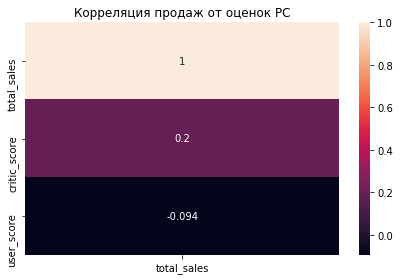

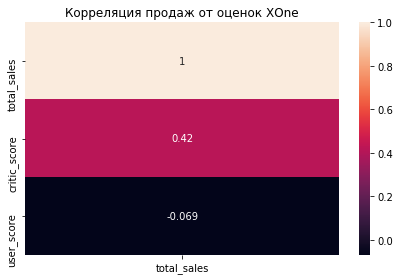

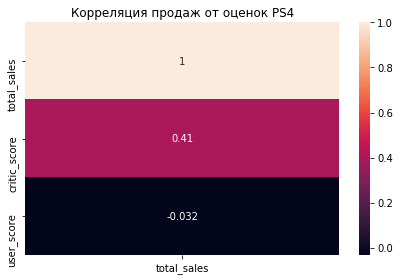

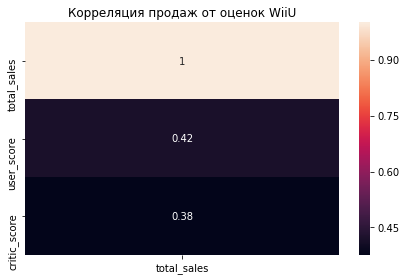

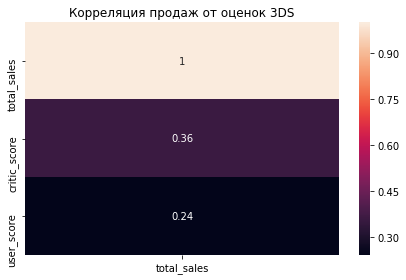

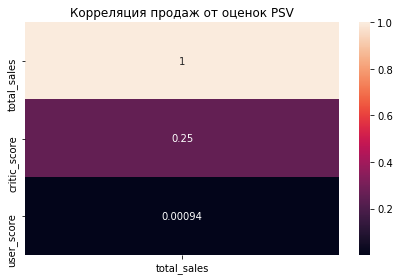

In [31]:
for platform in release_date.index:
    sns.heatmap(data[(data['platform'] == platform) & (data['year_of_release'] >= 2013)]\
                [['total_sales' ,'critic_score', 'user_score']].corr()[['total_sales']]\
            .sort_values(by='total_sales', ascending=False, ), annot=True)
    plt.title(f'Корреляция продаж от оценок {platform}')
    
    plt.tight_layout()
    plt.show()

- У всех современных консолей коэффициент корреляции влияния оценки критиков не превышает 0.42
- На XOne и PS4 одинаковое средее влияние оценок критиков и незначительное у пользователей
- Только у портативных консолей (3DS и WiiU) критики и пользователи почти одинаково влияют на продажи
- Критики на PC имеют вдвое меньшее влияние на судьбу релиза относительно коллег по консолям, это при самом слабом показателе влияния среди платформ у пользователей. Получается на PC рынке решающими являются иные факторы
- PSV сила критиков чуть значительней PC, роль пользователей все также не подтверждена

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

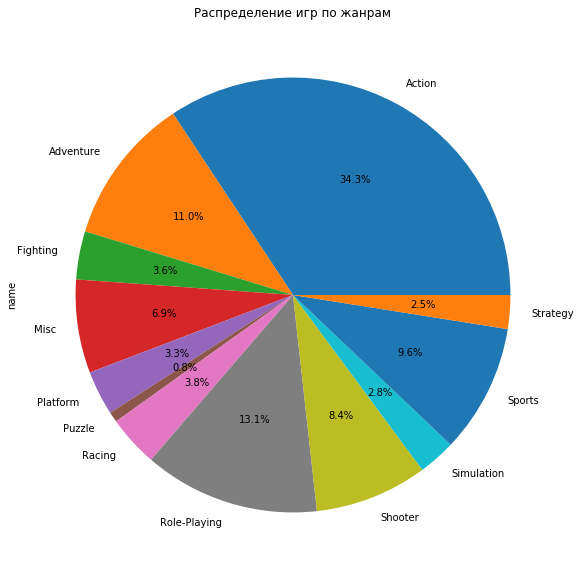

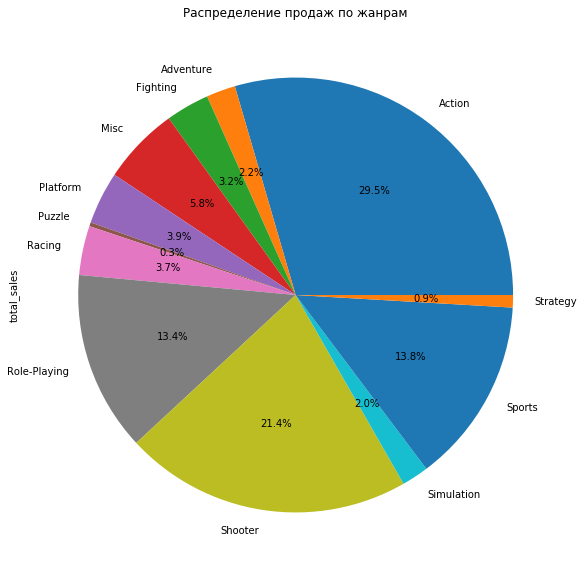

In [32]:
data[data['year_of_release'] >= 2013].groupby('genre')['name'].count().plot(kind = 'pie', autopct='%1.1f%%', figsize = (10, 10))
plt.title('Распределение игр по жанрам')
plt.show()

data[data['year_of_release'] >= 2013].groupby('genre')['total_sales'].sum()\
.plot(kind = 'pie', figsize = (10, 10), autopct='%1.1f%%')
plt.title('Распределение продаж по жанрам')
plt.show()

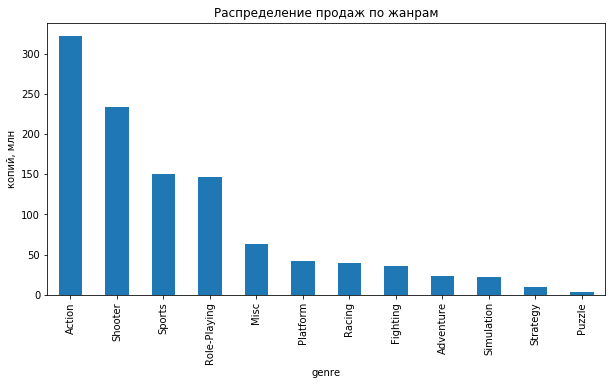

In [33]:
data[data['year_of_release'] >= 2013].groupby('genre')['total_sales'].sum().sort_values(ascending=False)\
.plot(kind = 'bar', figsize = (10, 5))\

plt.ylabel('копий, млн')
plt.title('Распределение продаж по жанрам')
plt.show()

- Жанр Action занимает примерно 34% рынка и имеет 30% от общих продаж 
- При 8% рынка Shooter зарабрал 21% продаж
- Role-playing  доля рынка 13.1%, продажи 13.4%
- Жанр Sports с охватом 9.6% смог получить 13.8% глобальных продаж
- Остальных жанры были скромно представлены и мало кто из них смог отстоять хотя бы "свою" долю. В основном это нишевые жанры.
- Лучший результат за данный период показали шутеры, они забрали в 2.5 больше продаж относительно своей доли 

<a id='Составим_портрет'></a>
### [Составим портрет пользователя каждого региона](#Составим_портрет) 
[Оглавление](#Оглавление)


Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [34]:
def top(groupby, region):
    data.groupby(groupby).agg({region : 'sum'}).sort_values(by=region, ascending=False)[:5].plot(kind='bar')
    plt.title(region + ' за всевремя')
    plt.ylabel('копий игр, млн')
    plt.show()

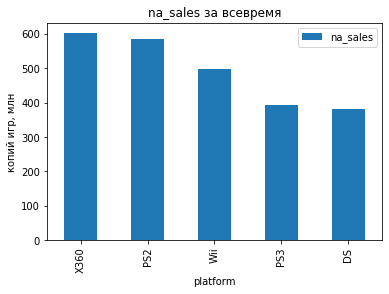

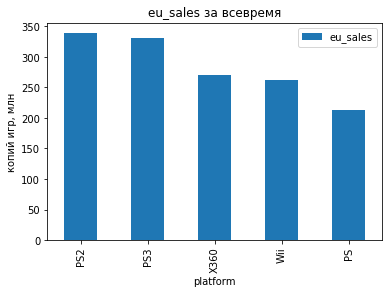

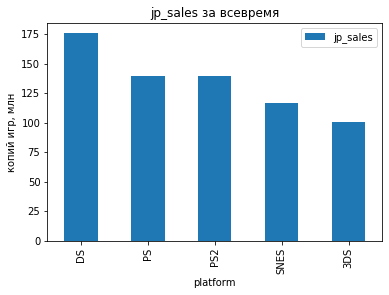

In [35]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    top('platform', region)

- В Сев. Америке была жесткая борьба X360 с PS2. На рынок Сев. Америки в целом пришлось больше продаж, чем на европейский с японским.
- В Европе PS2 соревновалась с PS3
- PS2 единственная консоль попавшая в топ5 во всех регионах
- В Японии лидирует портативная консоль, а XBox вообще никак не представлен

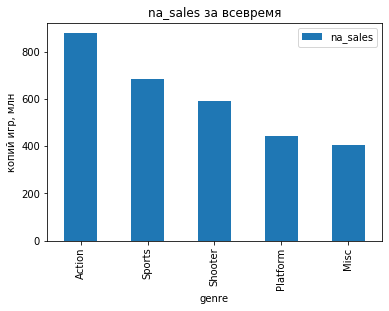

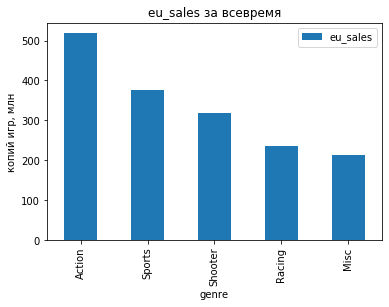

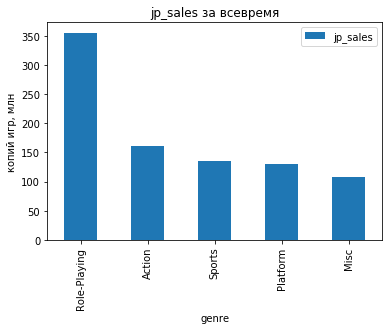

In [36]:
for region in regions:
    top('genre', region)

- Предпочтения в Сев. Америке и Европе полностью совпадают 
- Вот в Японии Role-Playing вне конкуренции. Но экшон и спортивные игры также в топ3

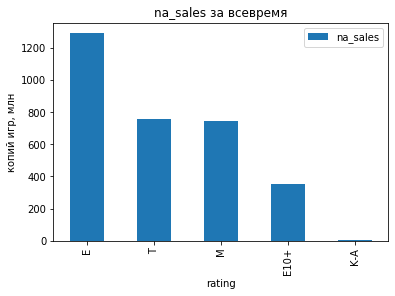

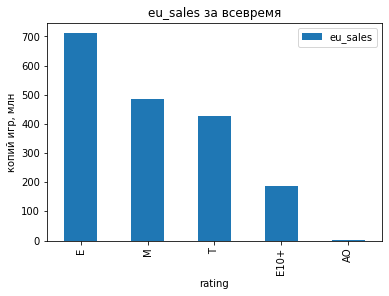

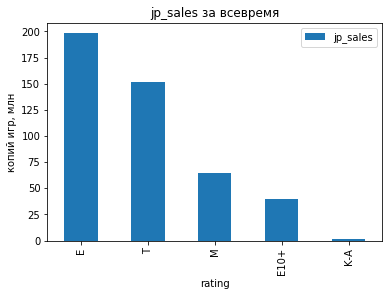

In [37]:
for region in regions:
    top('rating', region)

- Рейтинги ESRB
- EC — Early Childhood
- E — Everyone
- E10+ — Everyone 10+
- T — Teen
- M — Mature
- AO — Adults Only
- RP — Rating Pending

- Да рейтин влияет, рейтин "для всех" заметно лидирует. 
- В Европе и Сев. Америке  игры для 12+ и 15+ одинаково популярны. 
- В Японии игры  12+ в 2 раза восребованней чем 15+

<a id='Проверим_гипотезы'></a>
### [Проверим гипотезы](#Проверим_гипотезы) 
[Оглавление](#Оглавление)

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза №1:
   * H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
   * H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [38]:
from scipy import stats as st
alpha = .05

XOne = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
PC = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

In [39]:
results = st.ttest_ind(XOne, PC)

In [40]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые оказалась несостоятельной

Гипотеза №2:
   * H0: Средние пользовательские рейтинги  жанров Action и Sports одинаковые
   * H1: средний пользовательский рейтинг жанров Action и Sports разные

In [41]:
Action = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
Sports = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

In [42]:
results = st.ttest_ind(Action, Sports)

In [43]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Получается средние пользовательские рейтинги жанров Action и Sports одинаковые не случайно

<a id='Общий_вывод'></a>
### [Общий вывод](#Общий_вывод) 
[Оглавление](#Оглавление)


"Стримчику" рекомендуется сфокусироваться на рынках Сев. Америки и Европы. Оптимальными платформами в 2017 году для них должны оказаться XOne и PS4. Игры жанра Action, Shooter и Sports сейчас 'на волне'. Предпочтения стоит отдавать продукции с рейтингами: E, M, T и следить за оценками критиков для игровых новинок.